# Deep Learning Term Project for ECG (DIL700)

# Iteration 2

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import class_weight
import warnings
import os
from general_functions import *
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


warnings.filterwarnings('ignore')

## Loading Dataset

Collect all the data from the csv files

In [2]:
train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')
# Put together the training and testing
full_df=pd.concat([train_df,test_df],ignore_index=True)


## Removing class 3 and renaming class 4 to class 3

In [3]:
train_df = train_df[train_df[187] != 3]
test_df = test_df[test_df[187] != 3]
full_df = full_df[full_df[187] != 3]

train_df.loc[train_df[187] == 4, 187] = 3
test_df.loc[test_df[187] == 4, 187] = 3
full_df.loc[full_df[187] == 4, 187] = 3


In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [5]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [6]:
print(train_df[187].unique())

[0. 1. 2. 3.]


In [7]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Paced']
labels_short =  ["N","S","V","Q"]

In [8]:
print('Number of samples in data:')
print(labels[0],':', len(train_df[train_df[187]==0]))
print(labels[1],':', len(train_df[train_df[187]==1]))
print(labels[2],':', len(train_df[train_df[187]==2]))
print(labels[3],':', len(train_df[train_df[187]==3]))

Number of samples in data:
Normal : 72471
Artial Premature : 2223
Premature ventricular contraction : 5788
Paced : 6431


In [9]:
print('Number of samples in data:')
print(labels[0],':', len(test_df[test_df[187]==0]))
print(labels[1],':', len(test_df[test_df[187]==1]))
print(labels[2],':', len(test_df[test_df[187]==2]))
print(labels[3],':', len(test_df[test_df[187]==3]))

Number of samples in data:
Normal : 18118
Artial Premature : 556
Premature ventricular contraction : 1448
Paced : 1608


## Bagging/Bootstrapping (sampling with replacement)

In [10]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_0=(train_df[train_df[187]==0]).sample(n=4000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=4000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=4000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=4000,random_state=125)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample])

## Preparation

In [11]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=82)

y_train_nn = pd.get_dummies(y_train, columns=[1])
y_train_nn = y_train_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

y_valid_nn = pd.get_dummies(y_valid, columns=[1])
y_valid_nn = y_valid_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test_nn = pd.get_dummies(y_test, columns=[1])
y_test_nn = y_test_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

In [12]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
47296,0.197531,0.367284,0.543210,0.317901,0.287037,0.459877,0.558642,0.583333,0.583333,0.608025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74112,1.000000,0.523077,0.251282,0.261538,0.220513,0.164103,0.143590,0.143590,0.164103,0.169231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72578,1.000000,0.960663,0.412008,0.033126,0.047619,0.089027,0.076605,0.066253,0.072464,0.064182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84516,0.933041,0.888035,0.822173,0.768386,0.688255,0.600439,0.501647,0.397366,0.277717,0.198683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74657,0.000000,0.136872,0.270950,0.368715,0.452514,0.572626,0.620112,0.701117,0.723464,0.754190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,0.978814,1.000000,0.338983,0.008475,0.067797,0.161017,0.148305,0.173729,0.245763,0.220339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86720,0.696275,0.610315,0.498567,0.391117,0.267908,0.167622,0.081662,0.031519,0.000000,0.010029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79780,0.831858,0.798673,0.747788,0.615044,0.484513,0.418142,0.393805,0.391593,0.504425,0.318584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74593,0.825279,0.921933,0.505576,0.037175,0.018587,0.126394,0.163569,0.152416,0.148699,0.141264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y_train

47296    0.0
74112    1.0
72578    1.0
84516    3.0
74657    1.0
        ... 
72758    1.0
86720    3.0
79780    2.0
74593    1.0
85536    3.0
Name: 187, Length: 12800, dtype: float64

In [14]:
X_valid

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
85065,0.957422,0.898734,0.822785,0.747986,0.652474,0.569620,0.459148,0.362486,0.257768,0.207135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73223,0.881773,0.788177,0.229064,0.017241,0.152709,0.187192,0.231527,0.236453,0.256158,0.261084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73445,1.000000,0.952880,0.308901,0.036649,0.130890,0.214660,0.183246,0.219895,0.287958,0.267016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73265,1.000000,0.991914,0.261456,0.013477,0.250674,0.288410,0.274933,0.253369,0.242588,0.242588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80472,1.000000,0.920415,0.723183,0.470588,0.287197,0.188581,0.095156,0.072664,0.072664,0.069204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,0.893082,0.676101,0.050314,0.009434,0.059748,0.044025,0.053459,0.031447,0.050314,0.040881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80198,0.746102,0.677060,0.485523,0.269488,0.200445,0.169265,0.178174,0.158129,0.153675,0.126949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12687,1.000000,0.518219,0.212551,0.212551,0.093117,0.000000,0.062753,0.174089,0.263158,0.289474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84154,0.994307,0.950664,0.899431,0.832068,0.746679,0.636622,0.519924,0.432638,0.350095,0.273245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dataset Distribution

### Training set

In [15]:
train_df[187]=train_df[187].astype(int)
equilibre_train=train_df[187].value_counts(sort=False)
print(equilibre_train)

0    4000
1    4000
2    4000
3    4000
Name: 187, dtype: int64


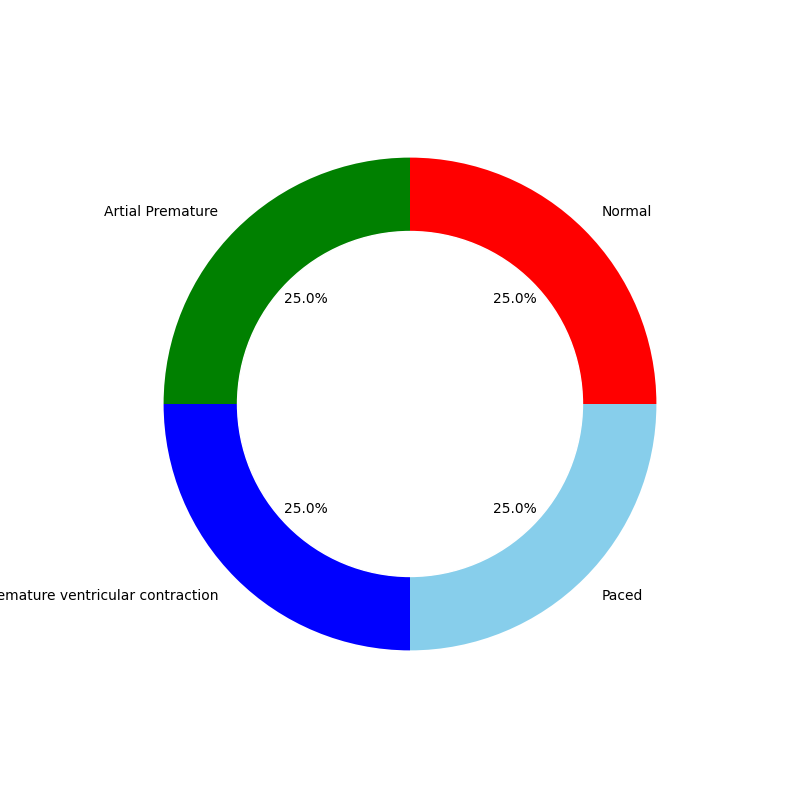

In [16]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_train, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Testing set

In [17]:
test_df[187]=test_df[187].astype(int)
equilibre_test=test_df[187].value_counts(sort=False)
print(equilibre_test)

0    18118
1      556
2     1448
3     1608
Name: 187, dtype: int64


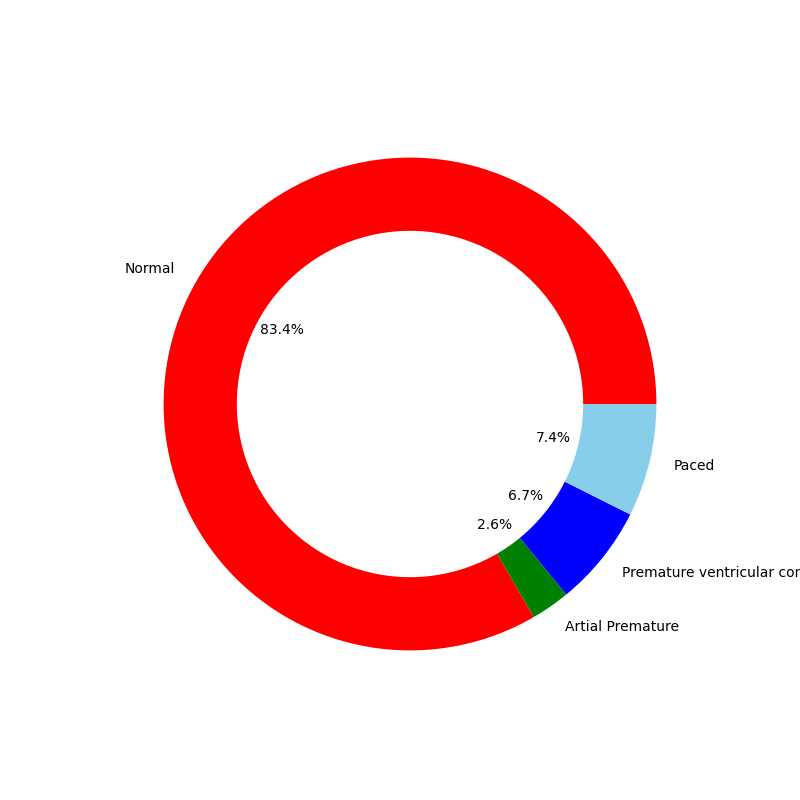

In [18]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_test, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Training some ML Models

### SVM

In [19]:
# Train SVM classifier
svm = SVC(kernel='poly', C=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=42)

In [20]:
y_pred_svm = svm.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_svm):.5f}')

Accuracy: 0.92803


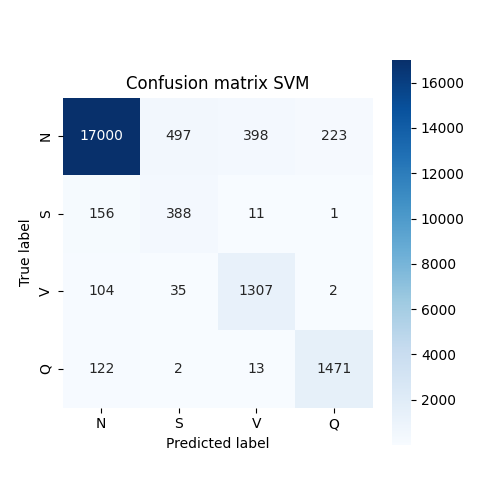

In [21]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix SVM')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [22]:
print(classification_report(y_test, y_pred_svm, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.98      0.94      0.96     18118
                 Artial Premature       0.42      0.70      0.53       556
Premature ventricular contraction       0.76      0.90      0.82      1448
                            Paced       0.87      0.91      0.89      1608

                         accuracy                           0.93     21730
                        macro avg       0.76      0.86      0.80     21730
                     weighted avg       0.94      0.93      0.93     21730



## Random Forest

In [23]:
# Train random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred_rfc = rfc.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_rfc):.5f}')

Accuracy: 0.95610


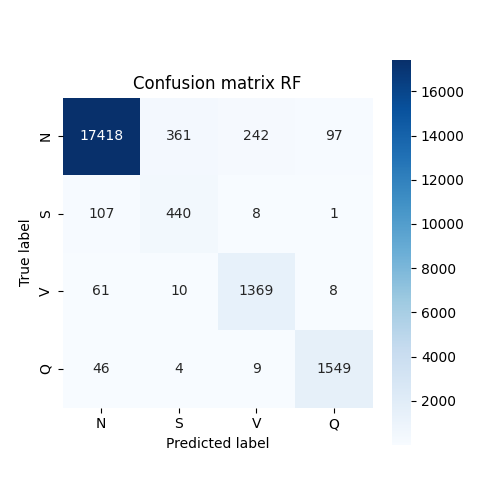

In [25]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix RF')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [26]:
print(classification_report(y_test, y_pred_rfc, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.99      0.96      0.97     18118
                 Artial Premature       0.54      0.79      0.64       556
Premature ventricular contraction       0.84      0.95      0.89      1448
                            Paced       0.94      0.96      0.95      1608

                         accuracy                           0.96     21730
                        macro avg       0.83      0.92      0.86     21730
                     weighted avg       0.96      0.96      0.96     21730

